In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

## Geometry & Nearest Neighbors

### 1. KNN

     sepal_len  sepal_wid  petal_len  petal_wid  class
0          5.1        3.5        1.4        0.2      0
1          4.9        3.0        1.4        0.2      0
2          4.7        3.2        1.3        0.2      0
3          4.6        3.1        1.5        0.2      0
4          5.0        3.6        1.4        0.2      0
..         ...        ...        ...        ...    ...
145        6.7        3.0        5.2        2.3      2
146        6.3        2.5        5.0        1.9      2
147        6.5        3.0        5.2        2.0      2
148        6.2        3.4        5.4        2.3      2
149        5.9        3.0        5.1        1.8      2

[150 rows x 5 columns]
['setosa' 'versicolor' 'virginica']


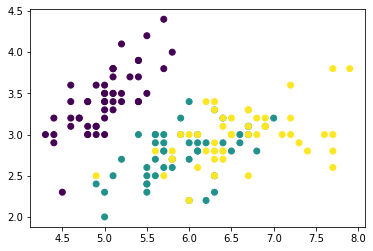

In [ ]:
# loading iris dataset!
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df['class'] = iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
print(iris_df)
print(iris.target_names)

plt.scatter(iris_df['sepal_len'], iris_df['sepal_wid'], c=iris_df['class'])
plt.show()

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: class, Length: 100, dtype: int64


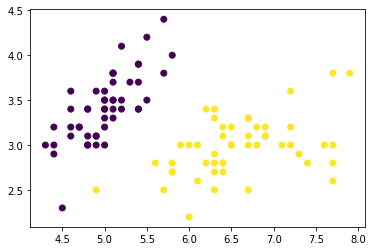

In [ ]:
binary_iris = iris_df.copy()

for i in range(len(binary_iris['class'])):
    label = binary_iris['class'][i]
    if label == 1:
        binary_iris = binary_iris.drop(i)
    if label == 2:
        binary_iris.at[i, 'class'] = 1

binary_iris = binary_iris.reset_index()
print(binary_iris['class'])

plt.scatter(binary_iris['sepal_len'], binary_iris['sepal_wid'], c=binary_iris['class'])
plt.show()
# setosa or virginica!

In [ ]:
def knn_predict(x_name, y_name, t, data, k, classname='class'):
    points = list()

    for idx, row in data.iterrows():
        dist = np.sqrt((t[0] - data[x_name][idx]) ** 2 + (t[1] - data[y_name][idx]) ** 2)
        points.append((dist, row[classname]))
    
    points.sort(key=lambda x: x[0])

    avg = 0

    for i in range(k):
        avg += points[i][1]

    avg /= k
    return avg

p = (5.25, 2.9)
pred = knn_predict('sepal_len', 'sepal_wid', p, binary_iris, 5, 'class')
print(pred) # takes average val. of nearest points! 0.5 is in the middle

0.2


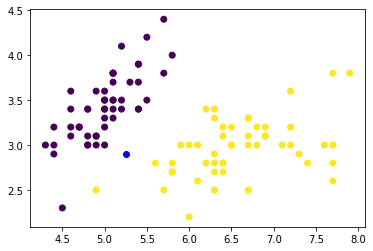

In [ ]:
plt.scatter(binary_iris['sepal_len'], binary_iris['sepal_wid'], c=binary_iris['class'])
plt.plot(*p, 'bo')
plt.show()

### 2. K-Means Clustering

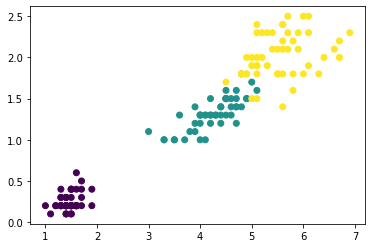

In [ ]:
plt.scatter(iris_df['petal_len'], iris_df['petal_wid'], c=iris_df['class'])
plt.show()

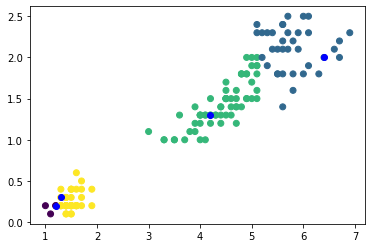

In [ ]:
def k_means_cluster(x_name, y_name, data, k):
    data_len = len(data[x_name])
    centers = list()
    p_centers = list()
    assignments = [None] * data_len

    for i in range(k):
        r = np.random.randint(data_len)
        centers.append((data[x_name][r], data[y_name][r]))
    
    while centers != p_centers:
        p_centers = centers

        for i in range(data_len):
            min_dist = float('inf')
            min_idx = 0
            cur_p = (data[x_name][i], data[y_name][i])

            for j in range(k):
                dist = np.sqrt((centers[j][0] - cur_p[0]) ** 2 + (centers[j][1] - cur_p[1]) ** 2)

                if dist < min_dist:
                    min_idx = j
                    min_dist = dist
                    
            assignments[i] = min_idx
        
        for i in range(k):
            k_center_x = 0
            k_center_y = 0
            count = 0

            for j in range(data_len):
                if assignments[j] == k:
                    count += 1
                    k_center_x += data[x_name][j]
                    k_center_y += data[y_name][j]
            
            if count != 0:
                centers[i][0] = k_center_x / count
                centers[i][1] = k_center_y / count 
    
    return centers, assignments

centers, assignments = k_means_cluster('petal_len', 'petal_wid', iris_df, 4)

iris_df_clustering = iris_df.copy()
iris_df_clustering['class'] = assignments

plt.scatter(iris_df_clustering['petal_len'], iris_df_clustering['petal_wid'], c=iris_df_clustering['class'])

for p in centers:
    plt.plot(*p, 'bo')
    
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3840575e-df36-4aee-ae86-e592fe6ba1f0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>